In [36]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read and store my database from openipf .csv
df = pd.read_csv(r'C:\Users\rbenoist\Desktop\Python-main\Code\Analyse IPF python\IPF\IPF-analysis\openipf-2022-11-26-25c7d08e.csv')

c:\Users\rbenoist\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (33,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
# get the dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131003 entries, 0 to 1131002
Data columns (total 41 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Name              1131003 non-null  object 
 1   Sex               1131003 non-null  object 
 2   Event             1131003 non-null  object 
 3   Equipment         1131003 non-null  object 
 4   Age               817015 non-null   float64
 5   AgeClass          855285 non-null   object 
 6   BirthYearClass    867737 non-null   object 
 7   Division          1130058 non-null  object 
 8   BodyweightKg      1117700 non-null  float64
 9   WeightClassKg     1119513 non-null  object 
 10  Squat1Kg          421363 non-null   float64
 11  Squat2Kg          416966 non-null   float64
 12  Squat3Kg          406089 non-null   float64
 13  Squat4Kg          326 non-null      float64
 14  Best3SquatKg      809273 non-null   float64
 15  Bench1Kg          608959 non-null   float64
 16  

In [38]:
# have a view of the dataframe

df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Karen Thomson,F,SBD,Single-ply,39.5,35-39,40-49,Masters 1,51.90,52,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
1,Deborah Groves,F,SBD,Single-ply,30.5,24-34,24-39,Open,50.64,52,...,Yes,Australia,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
2,Renee Orbon,F,SBD,Single-ply,31.5,24-34,24-39,Open,55.76,56,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
3,Rikki Flanders,F,SBD,Single-ply,31.5,24-34,24-39,Open,56.42,60,...,Yes,Australia,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
4,Julie Hallmond,F,SBD,Single-ply,NaN,NaN,50-59,Masters 2,58.20,60,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships


In [61]:
# User parameters

# How many athletes do we want to study ?
n_athlete = 10

# Choose mode "national" or "international"; national mode is related to the "country" value
mode = "national"

# Choose the athlete's sex "M" or "F"
sex = "F" 

# Choose athlete equipment "Raw" or "Single-ply"
equipment = "Raw"

# Choose athlete event "SBD" or "B"
event = "SBD"

# Choose athlete country related to national mode
country = "France"

# Store the different federations
federation_1 = "FFForce"
federation_2 = "IPF"
federation_3 = "EPF"
forbidden_division = "Prime Time"

# Choose the limit date of the data
end_date = "2023-01-01"

In [69]:
# Fix parameters

male_list = ['59', '66', '74', '83', '93', '105', '120', '120+']
female_list = ['47', '52', '57', '63', '69', '76', '84', '84+']

if sex == "F":
    for x in female_list:
        if mode == "national" :
            df1 = df.loc[
                (df['Sex'] == sex)
                & 
                (df['WeightClassKg'] == x)
                & 
                (df['Equipment'] == equipment)
                & 
                (df['Event'] == event)
                &
                (
                    (df['Federation'] == federation_1)
                    |
                    (df['Federation'] == federation_2) & (df['Country'] == country)
                    |
                    (df['Federation'] == federation_3) & (df['Country'] == country)
                )
                &
                (df['Division'] != forbidden_division)
                &
                (df['Date'] < end_date)
            ]
        else :
            df1 = df.loc[
                (df['Sex'] == sex)
                & 
                (df['WeightClassKg'] == x)
                & 
                (df['Equipment'] == equipment)
                & 
                (df['Event'] == event)
                &
                (
                    (df['Federation'] == federation_2)
                    |
                    (df['Federation'] == federation_3)
                )
                &
                (df['Division'] != forbidden_division)
                &
                (df['Date'] < end_date)
            ]
else:
    for x in male_list:
        print(x)


In [87]:
# Creating a dictionary
d = {}

# Fix parameters

male_list = ['59', '66', '74', '83', '93', '105', '120', '120+']
female_list = ['47', '52', '57', '63', '69', '76', '84', '84+']

if sex == "F":
    for x in female_list:
        if mode == "national" :
            d[x] = pd.DataFrame(
                df.loc[
                (df['Sex'] == sex)
                & 
                (df['WeightClassKg'] == x)
                & 
                (df['Equipment'] == equipment)
                & 
                (df['Event'] == event)
                &
                (
                    (df['Federation'] == federation_1)
                    |
                    (df['Federation'] == federation_2) & (df['Country'] == country)
                    |
                    (df['Federation'] == federation_3) & (df['Country'] == country)
                )
                &
                (df['Division'] != forbidden_division)
                &
                (df['Date'] < end_date)
                ]
            )
        else :
            d[x] = pd.DataFrame(
                df.loc[
                (df['Sex'] == sex)
                & 
                (df['WeightClassKg'] == x)
                & 
                (df['Equipment'] == equipment)
                & 
                (df['Event'] == event)
                &
                (
                    (df['Federation'] == federation_2)
                    |
                    (df['Federation'] == federation_3)
                )
                &
                (df['Division'] != forbidden_division)
                &
                (df['Date'] < end_date)
            ]
            )
else:
    for x in male_list:
        print(x)

In [91]:
d

{'47':                        Name Sex Event Equipment   Age AgeClass BirthYearClass  \
 662133        Cathy Phatien   F   SBD       Raw  25.5    24-34          24-39   
 662155   Laurence Hernandez   F   SBD       Raw  41.0    40-44          40-49   
 662248       Julia Lasbleiz   F   SBD       Raw  25.0    24-34          24-39   
 662522    Clémentine Tastet   F   SBD       Raw  31.0    24-34          24-39   
 663091            Loïse Guy   F   SBD       Raw  20.5    20-23          19-23   
 ...                     ...  ..   ...       ...   ...      ...            ...   
 1106878       Andréa Zicaro   F   SBD       Raw  20.5    20-23          19-23   
 1106930     Nathalie Feraud   F   SBD       Raw  48.0    45-49          40-49   
 1127168     Noémie Allabert   F   SBD       Raw  26.5    24-34          24-39   
 1127316       Andréa Zicaro   F   SBD       Raw  22.5    20-23          19-23   
 1127435      Maria Parreira   F   SBD       Raw  51.5    50-54          50-59   
 
        

In [40]:
# Filter my table to get the 1st athlete category

# Take the right weight class related to the sex
if sex == "F" :
    cate = "47"
else :
    cate = "59"

# Filter my table
if mode == "national" :
    df1 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df1 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]


# Group by my table to take the max Goodlift per Athlete Name
df1 = df1.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top n_athlete of my table
df1 = df1.head(n_athlete)
df1

,Name,Goodlift
50,Tiffany Chapon,118.48
42,Noémie Allabert,104.62
47,Stéphanie Legard,101.62
2,Andréa Zicaro,92.38
3,Bénédicte LePanse,92.00
5,Cathy Phatien,88.01
41,Nathalie Piantino,84.96
33,Marianne Bouvard,84.72
52,Yvelise Martin,83.87
40,Nathalie Feraud,81.95


In [41]:
# Filter my table to get the 2nd athlete category

# Take the right weight class related to the sex
if sex == "F" :
    cate = "52"
else :  
    cate = "66"

# Filter my table
if mode == "national" :
    df2 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df2 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df2 = df2.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top n_athlete of my table
df2 = df2.head(n_athlete)
df2

,Name,Goodlift
137,Tiffany Chapon,117.69
120,Noémie Allabert,112.61
133,Shizuka Rico,112.24
21,Camille Hadrys,102.17
4,Alison Huet,99.68
68,Laurie Julien,98.78
11,Anna Maramotti,95.31
77,Lorraine Balbiani,91.17
106,Maëva Lambert,90.56
136,Stéphanie Legard,88.44


In [42]:
# Filter my table to get the 3rd athlete category

# Take the right weight class related to the sex
if sex == "F" :
    cate = "57"
else :
    cate = "74"

# Filter my table
if mode == "national" :
    df3 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df3 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df3 = df3.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top n_athlete of my table
df3 = df3.head(n_athlete)
df3

,Name,Goodlift
92,Jade Jacob,113.42
211,Océane Regis,104.08
231,Sovannphaktra Pal,99.85
37,Caroline Suné,99.39
2,Agnès Alves,96.85
137,Léa Gratacos,96.55
192,Mélodie Anthouard,95.36
190,Mélanie Pagesy,91.62
170,Marina Soyer-Bardi,90.45
21,Anna Maramotti,89.88


In [43]:
# Filter my table to get the 4th athlete category

# Take the right weight class related to the sex
if sex == "F" :
    cate = "63"
else :
    cate = "83"

# Filter my table
if mode == "national" :
    df4 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df4 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df4 = df4.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top n_athlete of my table
df4 = df4.head(n_athlete)
df4

,Name,Goodlift
266,Prescillia Bavoil,122.26
275,Samantha Eugenie,110.35
182,Ludivine Delos,102.57
222,Mathilde Rosset,97.48
43,Caroline Suné,95.49
242,Mélodie Anthouard,94.58
280,Sarah Saint Aime,93.05
252,Océane Regis,92.67
145,Justine Jouve,91.53
221,Mathilde Pataille,91.51


In [44]:
# Filter my table to get the 5th athlete category

# Take the right weight class related to the sex
if sex == "F" :
    cate = "69"
else : 
    cate = "93"

# Filter my table
if mode == "national" :
    df5 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df5 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df5 = df5.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top n_athlete of my table
df5 = df5.head(n_athlete)
df5

,Name,Goodlift
56,Prescillia Bavoil,118.10
16,Clara Peyraud,104.49
54,Pauline Le Bras,99.11
4,Andorina Bouchoux,98.26
31,Justine Jouve,88.37
7,Bertille Hedon,86.77
8,Camille Pailha,85.80
15,Clara Kaminski,82.93
25,Haingotiana Rasamimanantsoa,82.53
26,Isoline Berger,81.53


In [45]:
# Filter my table to get the 6th athlete category

# Take the right weight class related to the sex
if sex == "F" :
    cate = "76"
else :  
    cate = "105"

# Filter my table
if mode == "national" :
    df6 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df6 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df6 = df6.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top n_athlete of my table
df6 = df6.head(n_athlete)
df6

,Name,Goodlift
28,Laura Mautalen,110.28
6,Clara Peyraud,102.95
32,Margot Concolato,87.39
2,Angeline Berva,79.24
5,Christelle Mouandjo,78.74
23,Jessica Doorhyee,77.60
20,France Juilien,74.87
37,Pauline Leroux,74.17
31,Ludivine Leroy,71.66
12,Elisa Elleuch,70.18


In [46]:
# Filter my table to get the 7th athlete category

# Take the right weight class related to the sex
if sex == "F" :
    cate = "84"
else :
    cate = "120"

# Filter my table
if mode == "national" :
    df7 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df7 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df7 = df7.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top n_athlete of my table
df7 = df7.head(n_athlete)
df7

,Name,Goodlift
31,Kelly Millecamps,97.53
37,Lea Schreiner,86.28
26,Innès Allouache,85.20
49,Margot Concolato,83.73
7,Angeline Berva,83.51
54,Marion Attelly,79.48
29,Julie Franch Guerra,77.99
18,Cécile Brotons,73.86
13,Christelle Mouandjo,73.75
24,France Collinot,73.14


In [47]:
# Filter my table to get the 8th athlete category

# Take the right weight class related to the sex
if sex == "F" :
    cate = "84+"
else :
    cate = "120+"

# Filter my table 
if mode == "national" :
    df8 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df8 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df8 = df8.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top n_athlete of my table
df8 = df8.head(n_athlete)
df8

,Name,Goodlift
1,Amélie Mierger,108.24
17,Marie Stéphanie Vili,77.49
25,Rachelle Letaief,75.92
4,Atonina Vehikite,74.75
9,Cindy Hebe,73.01
7,Camille Dezier,72.46
0,Albane Benitah,71.41
13,Jennifer Bailleul,67.65
6,Camellia Messaoui,66.76
2,Angélique Lafont,66.02


In [48]:
# Store my result in an excel file
with pd.ExcelWriter(r"C:\Users\rbenoist\Desktop\Python-main\Code\Analyse IPF python\IPF\IPF-analysis\results.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    df1.to_excel(writer, header="47", sheet_name="47")
    df2.to_excel(writer, sheet_name="52")
    df3.to_excel(writer, sheet_name="57")
    df4.to_excel(writer, sheet_name="63")
    df5.to_excel(writer, sheet_name="69")
    df6.to_excel(writer, sheet_name="76")
    df7.to_excel(writer, sheet_name="84")
    df8.to_excel(writer, sheet_name="84+")

([<matplotlib.axis.XTick at 0x2616c3ed6a0>,
 [Text(1, 0, '47'),
  Text(2, 0, '52'),
  Text(3, 0, '57'),
  Text(4, 0, '63'),
  Text(5, 0, '69'),
  Text(6, 0, '76'),
  Text(7, 0, '84'),
  Text(8, 0, '84+')])

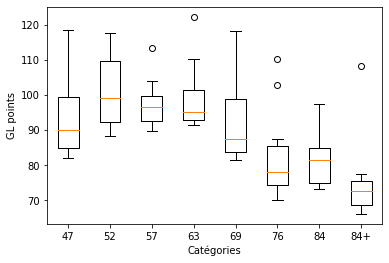

In [49]:
# Name my categories depending on "Sex" value
if sex == "F" :
    bars = ('47', '52', '57', '63', '69', '76', '84', '84+')
else :
    bars = ('59', '66', '74', '83', '93', '105', '120', '120+')

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True

# Plot a boxplot with top n-athlete per category
plt.boxplot(
    [
    df1['Goodlift'],
    df2['Goodlift'],
    df3['Goodlift'],
    df4['Goodlift'],
    df5['Goodlift'],
    df6['Goodlift'],
    df7['Goodlift'],
    df8['Goodlift']
    ]
)

# Name my labels
plt.ylabel('GL points')
plt.xlabel('Catégories')

# Adjust y axis
# plt.ylim([90, 140])

# Name my xticks according to my "bars" value
plt.xticks([1, 2, 3, 4, 5 , 6, 7 , 8], bars)

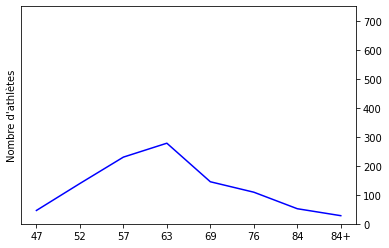

In [50]:
# Display number of athletes per categories
n_cate = np.array([46, 139, 230, 278, 145, 109, 52, 28])

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

plt.ylim([0, 750])
plt.ylabel("Nombre d'athlètes")
t = plt.ylabel("Nombre d'athlètes");
plt.plot(bars, n_cate, color = 'blue')

([<matplotlib.axis.XTick at 0x26116828970>,
 [Text(1, 0, '47'),
  Text(2, 0, '52'),
  Text(3, 0, '57'),
  Text(4, 0, '63'),
  Text(5, 0, '69'),
  Text(6, 0, '76'),
  Text(7, 0, '84'),
  Text(8, 0, '84+')])

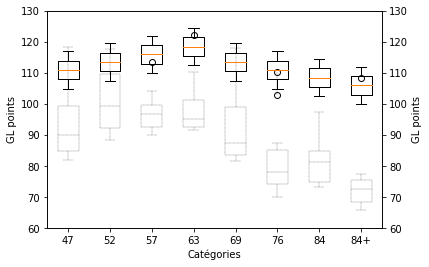

In [51]:
# Display 2 boxplots on same graph
plt.boxplot(
    [
    df1['Goodlift'],
    df2['Goodlift'],
    df3['Goodlift'],
    df4['Goodlift'],
    df5['Goodlift'],
    df6['Goodlift'],
    df7['Goodlift'],
    df8['Goodlift']
    ], 
    boxprops= dict(linestyle='--',linewidth=0.25, color='black'),
    whiskerprops=dict(linestyle='--',linewidth=0.25, color='black'),
    medianprops = dict(linestyle='--', linewidth=0.25, color='black'),
    capprops = dict(linestyle='--', linewidth=0.25, color='black'),
    flierprops = dict(linestyle='--', linewidth=0.25, color='black')
)
plt.ylim([60, 130])
plt.ylabel('GL points')
plt.xlabel('Catégories')
plt.xticks([1, 2, 3, 4, 5 , 6, 7 , 8], bars)


# both boxplot
plt.twinx()
a = np.arange(105, 117.5, 1).tolist()
b = np.arange(107.5, 120, 1).tolist()
c = np.arange(110, 122.5, 1).tolist()
d = np.arange(112.5, 125, 1).tolist()
e = np.arange(107.5, 120, 1).tolist()
f = np.arange(105, 117.5, 1).tolist()
g = np.arange(102.5, 115, 1).tolist()
h = np.arange(100, 112.5, 1).tolist()
plt.boxplot(
    [
    a,
    b,
    c,
    d,
    e,
    f,
    g,
    h
    ], widths = 0.5
)
plt.ylim([60, 130])
plt.ylabel('GL points')
plt.xlabel('Catégories')
plt.xticks([1, 2, 3, 4, 5 , 6, 7 , 8], bars)

{'whiskers': [<matplotlib.lines.Line2D at 0x261169880d0>,
 'caps': [<matplotlib.lines.Line2D at 0x261169887f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26116978dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x26116988f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x26116995250>],
 'means': []}

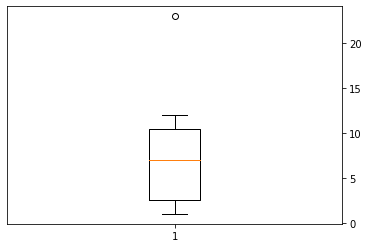

In [52]:
# display a typical boxplot in order to describe it on my presentation

plt.boxplot([1,2,3,7,9,12,23])